In [1]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
import gym

from scan_gym import envs
#imp.reload(envs)

#seed=42
#np.random.seed(seed)

import random

In [2]:
def plot_vol(vol):
    # for creating a responsive plot
    %matplotlib widget

    # importing required libraries
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt

    #x,y,z = np.where(vol[:64,:64,:128]==1)
    
    x,y,z = np.where(vol==1)

    # creating figure
    fig = plt.figure()
    ax = Axes3D(fig)

    #ax.set_xlim3d(0, 10)
    #ax.set_ylim3d(0, 10)
    #ax.set_zlim3d(0, 10)

    #ax.set_xlim3d(0, 140)
    #ax.set_ylim3d(0, 140)
    #ax.set_zlim3d(0, 140)

    # creating the plot
    ax.scatter(x, y, z, color='green',s=1)

    #x,y,z = np.where(spc.sc.values()==0)
    #plot_geeks = ax.scatter(x, y, z, color='red',s=1)

    # setting title and labels
    ax.set_title("3D plot")
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    ax.grid()
    
    #make  0 origin coincide in all axis
    ax.xaxis._axinfo['juggled'] = (0,0,0)
    ax.yaxis._axinfo['juggled'] = (1,1,1)
    ax.zaxis._axinfo['juggled'] = (2,2,2)
    
    ax.view_init(90, 0)

    # displaying the plot
    plt.show()

In [14]:
models = ['206_2d','211_2d']
n_images = 15
continuous = True
scan_env = gym.make('ScannerEnv-v1', models_path='/home/pico/uni/romi/scanner-gym_models', train_models=models,
                   n_images = n_images, continuous=continuous, gt_mode=True, cube_view='static')

In [15]:
init_state = scan_env.reset()
print('theta', init_state[2], 'phi', init_state[3])
plot_vol(init_state[1])

theta [8] phi [3]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [86]:
if continuous:
    #rnd [-1,1]
    action =2*np.random.rand(2)-1
    print(action)
    state, reward, done, _ = scan_env.step(action) 
else:    
    state, reward, done, _ = scan_env.step(np.random.randint(scan_env.nA))
    
print('step', scan_env.num_steps, 'theta', state[2], 'phi', state[3],
      'done', done,'reward', reward, 'similarity', scan_env.spc.gt_compare_solid())

if done:
    print('cumulative reward',scan_env.total_reward)
    scan_env.reset()
    
plot_vol(state[1])

[ 0.8118322  -0.02541648]
step 14 theta [151] phi [1] done True reward 0.011475940757546432 similarity 0.8158593231585932
cumulative reward 0.7515195968444562


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

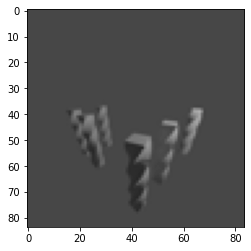

In [82]:
%matplotlib inline
plt.imshow(state[0][:,:,2],cmap='gray', vmin = 0, vmax = 255)
plt.show()

array([0.52313996, 0.121021  ])